<center>
 
# 3) Bike Share Mini Project - Modeling

### by Aditi Gala

<center>
<br>

In this notebook we attempt to create a model for the bikeshare daily data, building off from the initial exploratory analysis. We look at both continous and categorical features and create a Deep Neural Network model. The performance of the model is assessed using test data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.layers import Dense, LSTM, GRU, Conv1D,MaxPooling1D, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


### Daily Data

In [2]:
# Load the clean daily bikeshare data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/daily_clean.csv"
daily = pd.read_csv(file_path, index_col = 0)
print("Rows, Columns = ", daily.shape)
daily.head()

Rows, Columns =  (731, 21)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,...,windspeed,casual,registered,cnt,OneHot_1,OneHot_2,OneHot_3,Year,Month,Day
0,1,2011-01-01,1,0,1,0,6,0,0.344167,0.363625,...,0.160446,331,654,985,0,1,0,2011,1,1
1,2,2011-01-02,1,0,1,0,0,0,0.363478,0.353739,...,0.248539,131,670,801,0,1,0,2011,1,2
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,...,0.248309,120,1229,1349,1,0,0,2011,1,3
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,...,0.160296,108,1454,1562,1,0,0,2011,1,4
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,...,0.186900,82,1518,1600,1,0,0,2011,1,5


In [3]:
# Train, test, validation split: 60% train, 20% validation, and 20% test
cols_exclude = ['cnt', 'registered', 'casual', 'yr', 'mnth', 'dteday', 'weekday']
X_train, X_test, y_train, y_test = train_test_split(daily.drop(columns = cols_exclude), daily['cnt'], test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= .25) # .2 = val/(val+train) = .2/.2+.6

In [4]:
# Normaliza the input data
scObj = MinMaxScaler(feature_range = (0,1))
scObj.fit(X_train)
X_trainNorm = scObj.transform(X_train)
X_valNorm = scObj.transform(X_val)
X_testNorm = scObj.transform(X_test)

# Normalize the output data
scObj = MinMaxScaler(feature_range = (0,1))
scObj.fit(y_train.values.reshape(-1,1))
y_trainNorm = scObj.transform(y_train.values.reshape(-1,1))
y_valNorm = scObj.transform(y_val.values.reshape(-1,1))
y_testNorm = scObj.transform(y_test.values.reshape(-1,1))

In [5]:
# Instantiate Model
m = models.Sequential()
m.add(layers.Dense(units = 6, activation = 'relu', input_dim = X_trainNorm.shape[1]))
m.add(layers.Dropout(0.1))
m.add(layers.Dense(units = 8, activation = 'relu'))
m.add(layers.Dropout(0.1))
m.add(layers.Dense(units = 1, activation = "linear"))
m.compile(loss = "mean_squared_error",optimizer = 'RMSProp', metrics = ['mae'])
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


The model of choice for the daily data has two hidden layers. The first hiddel layer has 6 neurons, the second hidden layer has 8 neurons. Both the hidden layers have a "ReLu" activation function and are followed by a drop out layer to introduce some randomness into the model training and avoid over-fitting.

In [6]:
# Train the model
history = m.fit(X_trainNorm, y_trainNorm, 
                validation_data = (X_valNorm, y_valNorm), 
                verbose = 1, 
                epochs = 40, 
                batch_size = 8)

Train on 438 samples, validate on 146 samples
Epoch 1/40
438/438 [==============================] - 1s 3ms/step - loss: 0.1810 - mae: 0.3480 - val_loss: 0.0706 - val_mae: 0.2042
Epoch 2/40
438/438 [==============================] - 0s 363us/step - loss: 0.0787 - mae: 0.2155 - val_loss: 0.0385 - val_mae: 0.1562
Epoch 3/40
438/438 [==============================] - 0s 360us/step - loss: 0.0576 - mae: 0.1839 - val_loss: 0.0315 - val_mae: 0.1363
Epoch 4/40
438/438 [==============================] - 0s 355us/step - loss: 0.0425 - mae: 0.1612 - val_loss: 0.0285 - val_mae: 0.1287
Epoch 5/40
438/438 [==============================] - 0s 352us/step - loss: 0.0431 - mae: 0.1586 - val_loss: 0.0263 - val_mae: 0.1261
Epoch 6/40
438/438 [==============================] - 0s 358us/step - loss: 0.0395 - mae: 0.1505 - val_loss: 0.0246 - val_mae: 0.1224
Epoch 7/40
438/438 [==============================] - 0s 352us/step - loss: 0.0344 - mae: 0.1408 - val_loss: 0.0230 - val_mae: 0.1169
Epoch 8/40
438/438

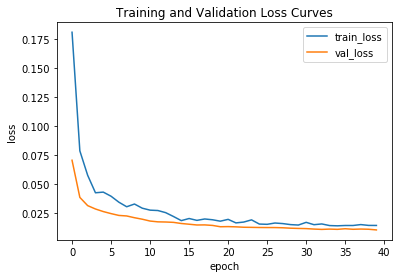

In [7]:
# Plot of loss curves for daily model
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss Curves')
plt.legend() 
plt.show()

The validation and training loss curves are pretty

147/147 [==============================] - 0s 89us/step
MAE on the test for daily model is 0.081


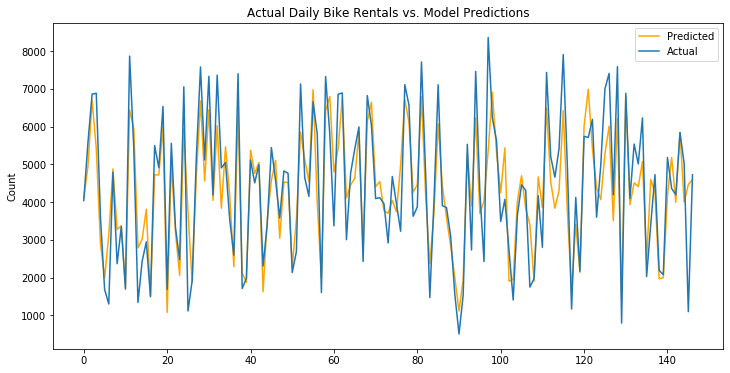

In [8]:
# Model Error
print('MAE on the test for daily model is %.3f' % m.evaluate(X_testNorm, y_testNorm)[1])


# Model Predictions
y_preds = m.predict(X_testNorm)

# Plot of predictions vs. actual
plt.figure(figsize = (12,6))
plt.plot(scObj.inverse_transform(y_preds.reshape(-1, 1)), label='Predicted', color = 'orange')
plt.plot(scObj.inverse_transform(y_testNorm.reshape(-1, 1)), label='Actual')
plt.ylabel("Count")
plt.title("Actual Daily Bike Rentals vs. Model Predictions")
plt.legend()
plt.show()

<br><br>

### Hourly Data

In [9]:
# Load the clean daily bikeshare data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/hourly_clean.csv"
hourly = pd.read_csv(file_path, index_col = 0)
print("Rows, Columns = ", hourly.shape)
hourly.head()

Rows, Columns =  (17379, 23)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,...,casual,registered,cnt,OneHot_1,OneHot_2,OneHot_3,OneHot_4,Year,Month,Day
0,1,2011-01-01,1,0,1,0,0,6,0,0.24,...,3,13,16,1,0,0,0,2011,1,1
1,2,2011-01-01,1,0,1,1,0,6,0,0.22,...,8,32,40,1,0,0,0,2011,1,1
2,3,2011-01-01,1,0,1,2,0,6,0,0.22,...,5,27,32,1,0,0,0,2011,1,1
3,4,2011-01-01,1,0,1,3,0,6,0,0.24,...,3,10,13,1,0,0,0,2011,1,1
4,5,2011-01-01,1,0,1,4,0,6,0,0.24,...,0,1,1,1,0,0,0,2011,1,1


In [10]:
# Train, test, validation split: 60% train, 20% validation, and 20% test
cols_exclude = ['cnt', 'registered', 'casual', 'yr', 'mnth', 'dteday', 'weekday']
X_train, X_test, y_train, y_test = train_test_split(hourly.drop(columns = cols_exclude), hourly['cnt'], test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= .25) # .2 = val/(val+train) = .2/.2+.6

In [11]:
# Normaliza the input data
scObj = MinMaxScaler(feature_range = (0,1))
scObj.fit(X_train)
X_trainNorm = scObj.transform(X_train)
X_valNorm = scObj.transform(X_val)
X_testNorm = scObj.transform(X_test)

# Normalize the output data
scObj = MinMaxScaler(feature_range = (0,1))
scObj.fit(y_train.values.reshape(-1,1))
y_trainNorm = scObj.transform(y_train.values.reshape(-1,1))
y_valNorm = scObj.transform(y_val.values.reshape(-1,1))
y_testNorm = scObj.transform(y_test.values.reshape(-1,1))

In [12]:
# Instantiate Model
m = models.Sequential()
m.add(layers.Dense(units = 12, activation = 'relu', input_dim = X_trainNorm.shape[1]))
m.add(layers.Dropout(0.1))
m.add(layers.Dense(units = 12, activation = 'relu'))
m.add(layers.Dropout(0.1))
m.add(layers.Dense(units = 1, activation = "linear"))
m.compile(loss = "mean_squared_error",optimizer = 'RMSProp', metrics = ['mae'])
m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


The model of choice for the hourly data has two hidden layers, but with more neurons compared to the daily data model. This is because we have more hourly data points which would be sufficient to train a slightly more complex model than what we have with the limited daily data. The first and second hidden layers have 12 neurons each, the both have a "ReLu" activation function and are followed by a drop out layer to introduce some randomness into the model training and avoid over-fitting.

In [13]:
# Train the model
history = m.fit(X_trainNorm, y_trainNorm, 
                validation_data = (X_valNorm, y_valNorm), 
                verbose = 1, 
                epochs = 40, 
                batch_size = 8)

Train on 10427 samples, validate on 3476 samples
Epoch 1/40
10427/10427 [==============================] - 5s 516us/step - loss: 0.0289 - mae: 0.1275 - val_loss: 0.0230 - val_mae: 0.1099
Epoch 2/40
10427/10427 [==============================] - 4s 375us/step - loss: 0.0226 - mae: 0.1108 - val_loss: 0.0216 - val_mae: 0.0998
Epoch 3/40
10427/10427 [==============================] - 4s 389us/step - loss: 0.0205 - mae: 0.1049 - val_loss: 0.0179 - val_mae: 0.0975
Epoch 4/40
10427/10427 [==============================] - 6s 528us/step - loss: 0.0192 - mae: 0.1017 - val_loss: 0.0173 - val_mae: 0.0949
Epoch 5/40
10427/10427 [==============================] - 4s 409us/step - loss: 0.0183 - mae: 0.0991 - val_loss: 0.0172 - val_mae: 0.0895
Epoch 6/40
10427/10427 [==============================] - 5s 439us/step - loss: 0.0178 - mae: 0.0973 - val_loss: 0.0168 - val_mae: 0.0903
Epoch 7/40
10427/10427 [==============================] - 5s 457us/step - loss: 0.0171 - mae: 0.0952 - val_loss: 0.0152 - v

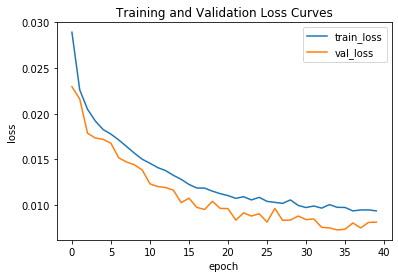

In [14]:
# Plot of loss curves for hourly model
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss Curves')
plt.legend() 
plt.show()

Since our training loss is higher than the val loss, this could be a sign of over-fitting. This means we could experiment with a less complex neural network. 

3476/3476 [==============================] - 0s 32us/step
MAE on the test for hourly model is 0.059


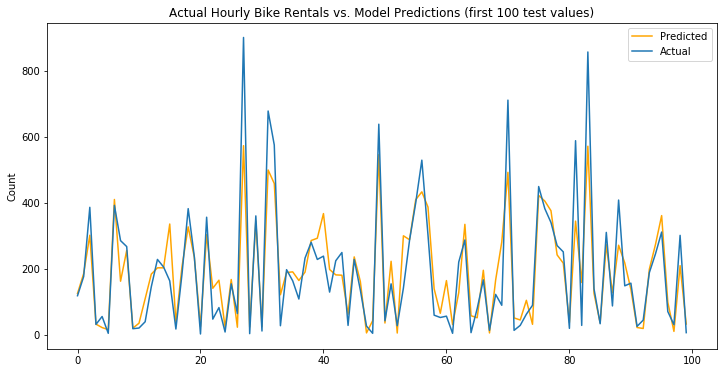

In [15]:
# Model Error
print('MAE on the test for hourly model is %.3f' % m.evaluate(X_testNorm, y_testNorm)[1])

# Model Predictions
y_preds = m.predict(X_testNorm)

# Plot of predictions vs. actual
plt.figure(figsize = (12,6))
plt.plot(scObj.inverse_transform(y_preds.reshape(-1, 1))[:100], label='Predicted', color = 'orange')
plt.plot(scObj.inverse_transform(y_testNorm.reshape(-1, 1))[:100], label='Actual')
plt.ylabel("Count")
plt.title("Actual Hourly Bike Rentals vs. Model Predictions (first 100 test values)")
plt.legend()
plt.show()